In [1]:
%run -i ./preamble.py

In [2]:
from simulate import *
from inverse_moments import *

In [3]:
import matplotlib

In [4]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
plt.rcParams["figure.figsize"] = (3.0, 3.0)
plt.rcParams["figure.dpi"] = 500
plt.rcParams["font.size"] = 12

In [6]:
selfCol = "tab:green"
extCol = "tab:purple"

In [7]:
lambda0 = 1.0
beta = 0.25
lambdaS = 3.0
lambdaE = 10.0
rho = 1.25
mat = 50.0

In [8]:
m1S = lambdaS / (lambdaS - 1) - 1
m1E = lambdaE / (lambdaE - 1) - 1
m2S = lambdaS / (lambdaS - 2) - 1
m2E = lambdaE / (lambdaE - 2) - 1

beta > rho * m1E, 2 * beta > rho * m2E

(True, True)

### Exact Simulation

In [9]:
R = 5

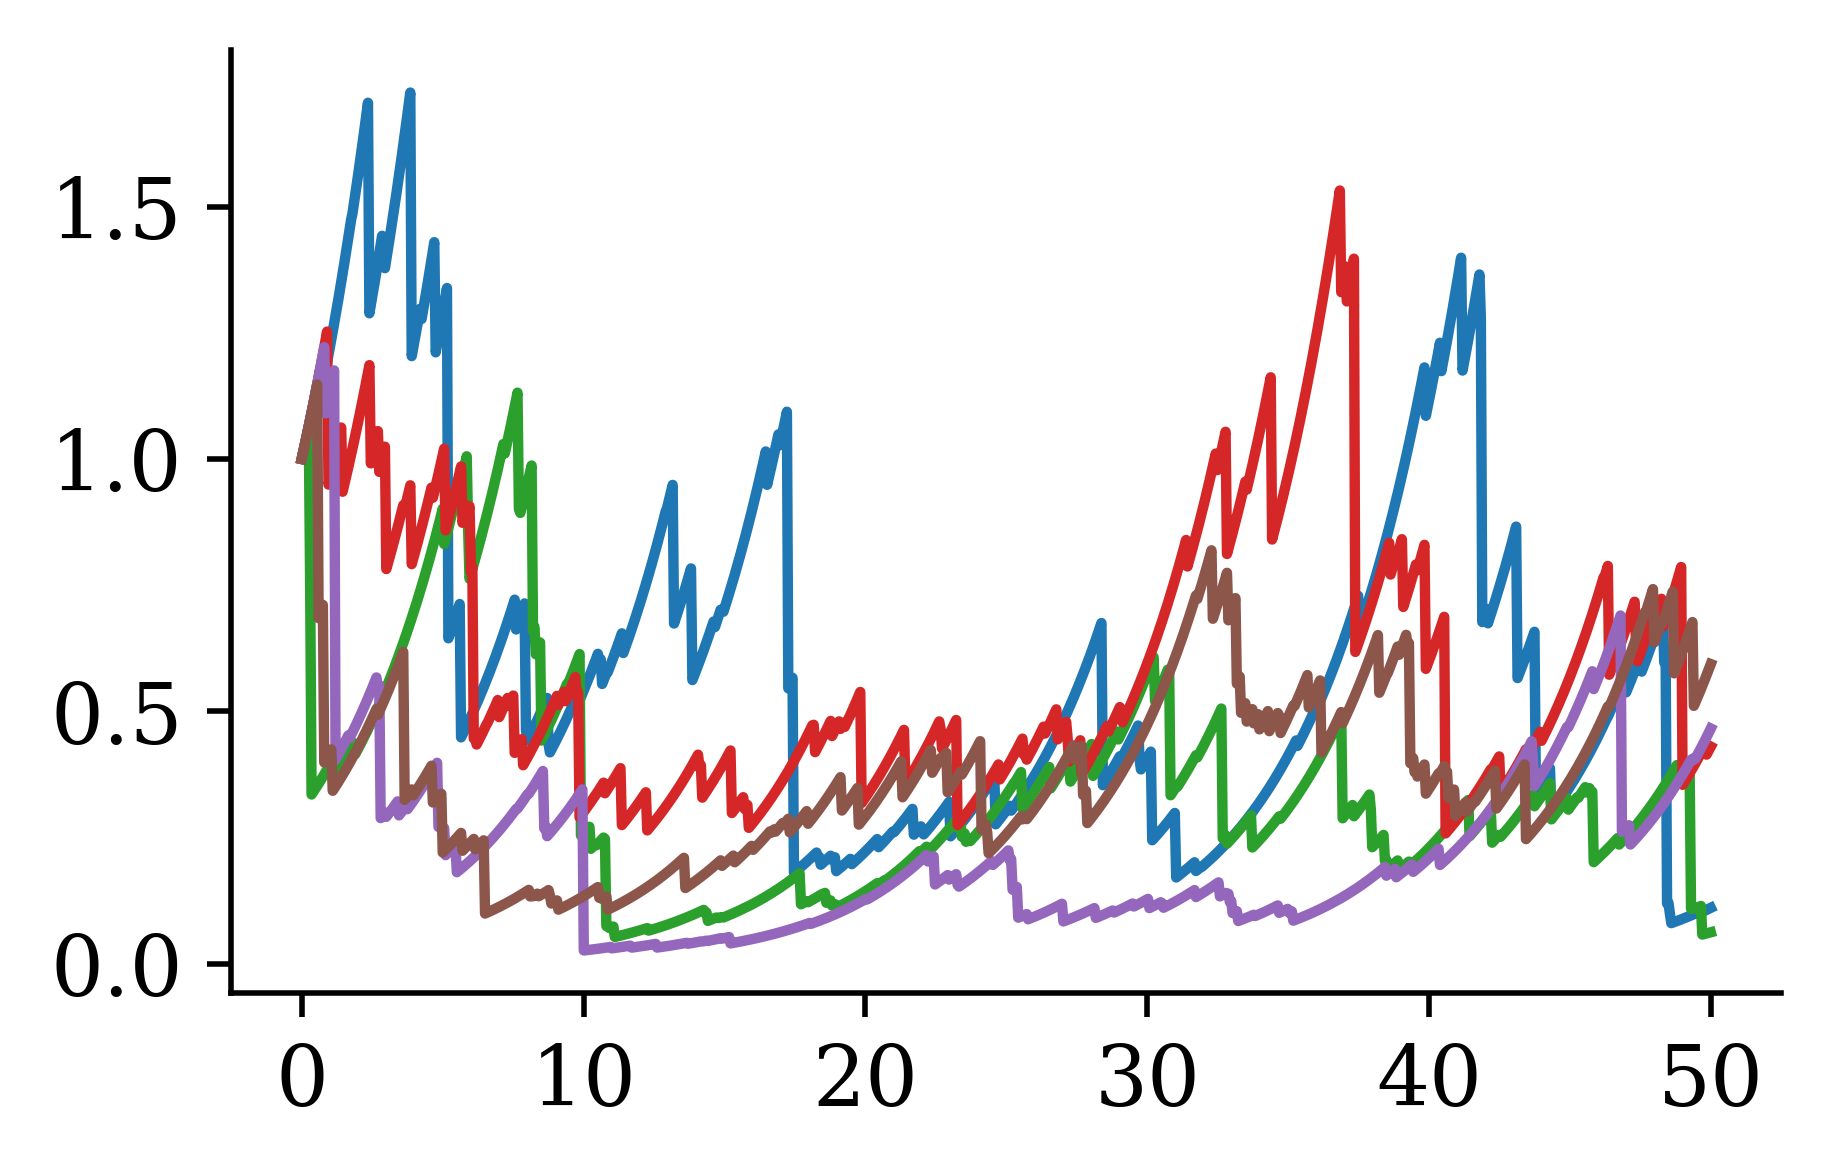

In [10]:
rnd.seed(1)
plt.figure(figsize=(4, 2.5))
ts, logLambdas = simulate_exact(lambda0, beta, lambdaS, lambdaE, rho, mat, R)

tGrid = np.linspace(0, mat, 1000)
for r in range(R):
    logInt = interp1d(
        ts[r, ~np.isnan(ts[r, :])],
        logLambdas[r, ~np.isnan(logLambdas[r, :])],
        assume_sorted=True,
    )
    plt.plot(tGrid, np.exp(logInt(tGrid)))

sns.despine()

### Simulate using thinning

In [11]:
step = 2.7

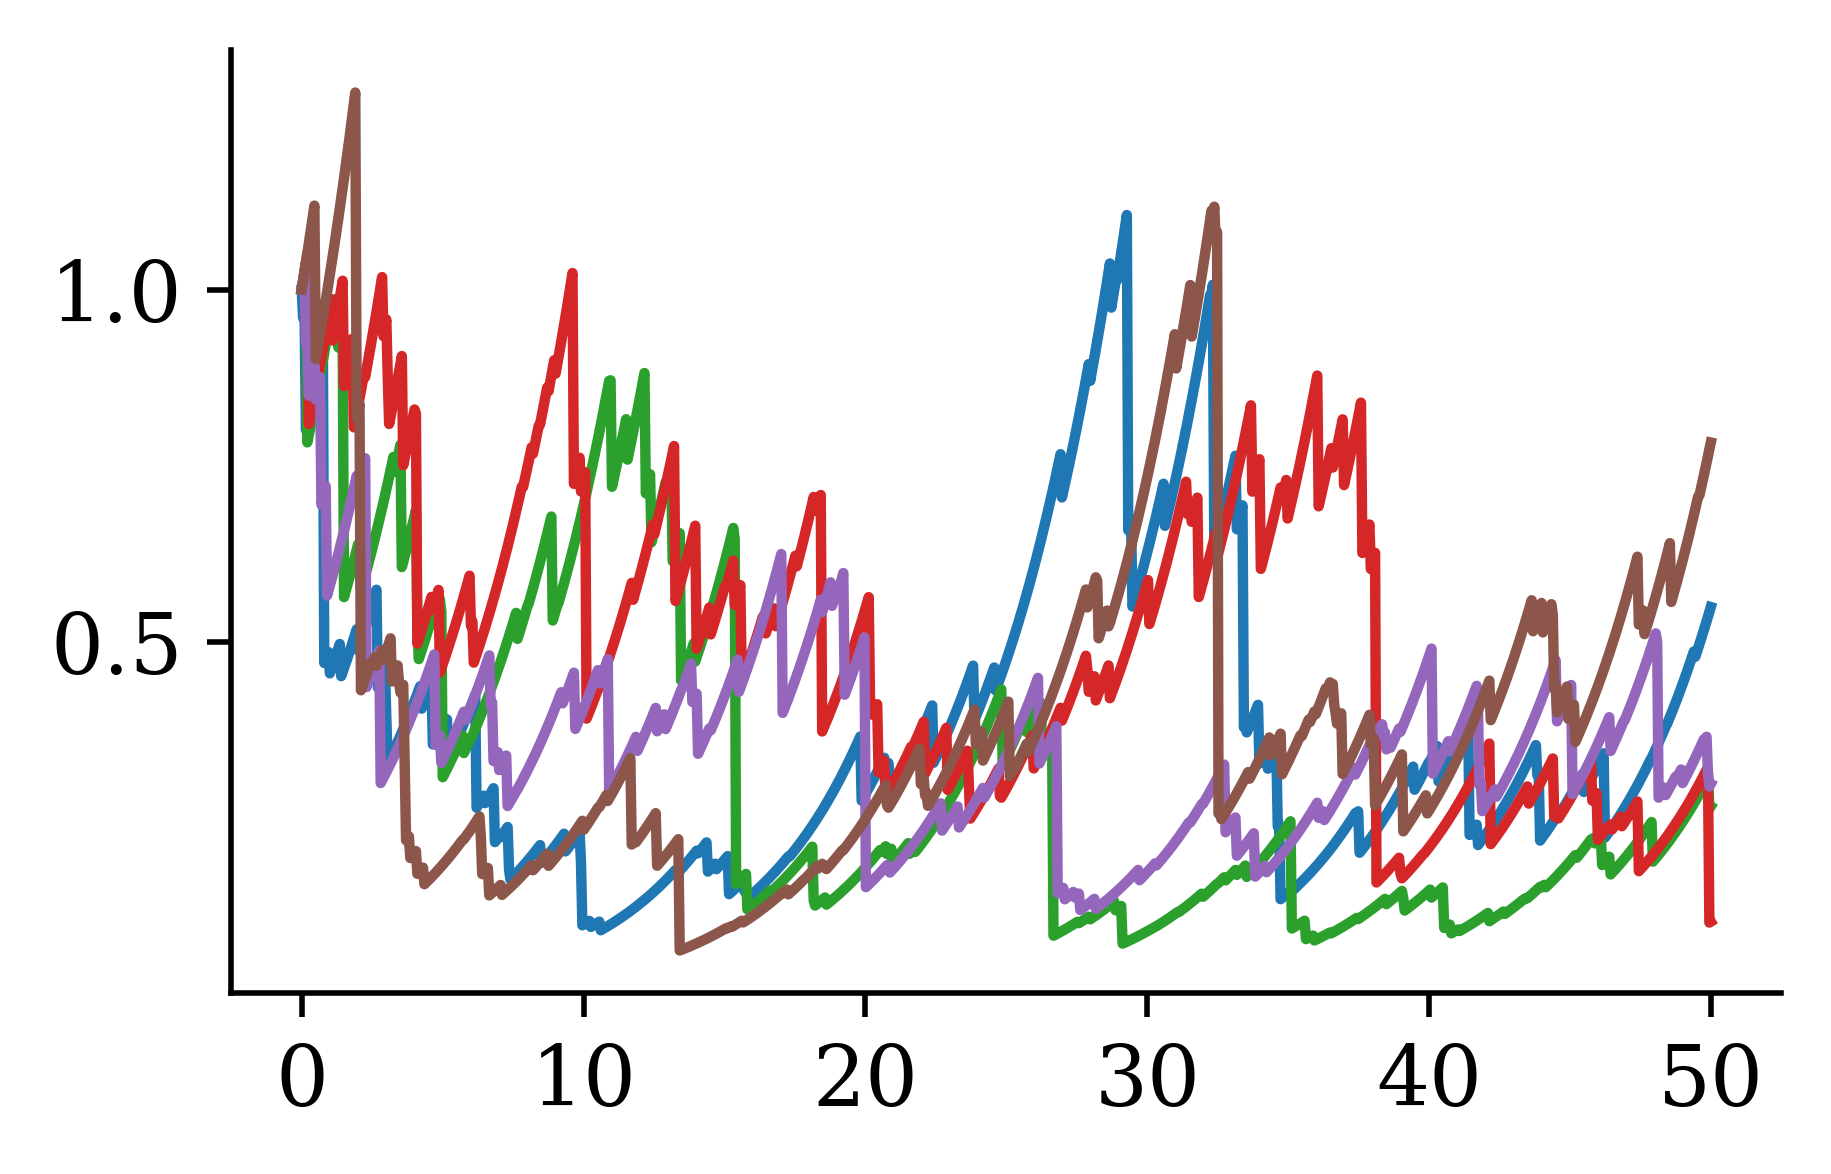

In [12]:
rnd.seed(1)
plt.figure(figsize=(4, 2.5))

tGrid = np.linspace(0, mat, 1000)
for r in range(R):
    ts, logLambdas = simulate_thinning(lambda0, beta, lambdaS, lambdaE, rho, mat, step)[
        :2
    ]
    logInt = interp1d(
        ts[~np.isnan(ts)], logLambdas[~np.isnan(logLambdas)], assume_sorted=True
    )
    plt.plot(tGrid, np.exp(logInt(tGrid)))

sns.despine()

## Compare theoretical and estimated moments of $Z_t := 1/\lambda_t$

In [13]:
tGrid = np.linspace(0, mat, 50)

In [14]:
rnd.seed(2)
RThin = 5 * 10 ** 3
RExact = RThin * 15

RThin *= 5
RExact *= 5

ZMoment1 = Z_moment(lambda0, lambdaS, lambdaE, rho, beta, tGrid, 1)
ZMoment2 = Z_moment(lambda0, lambdaS, lambdaE, rho, beta, tGrid, 2)

%time ZEstsThin, ZCIWidthsThin = Z_moments_thinning(lambda0, beta, lambdaS, lambdaE, rho, mat, step, tGrid, RThin, [1, 2])
%time ZEstsExact, ZCIWidthsExact = Z_moments_exact(lambda0, beta, lambdaS, lambdaE, rho, mat, tGrid, RExact, [1, 2])

100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [01:03<00:00, 395.03it/s]


Wall time: 1min 3s


100%|████████████████████████████████████████████████████████████████████████| 375000/375000 [00:57<00:00, 6522.27it/s]


Wall time: 1min 18s


### Compare first moment

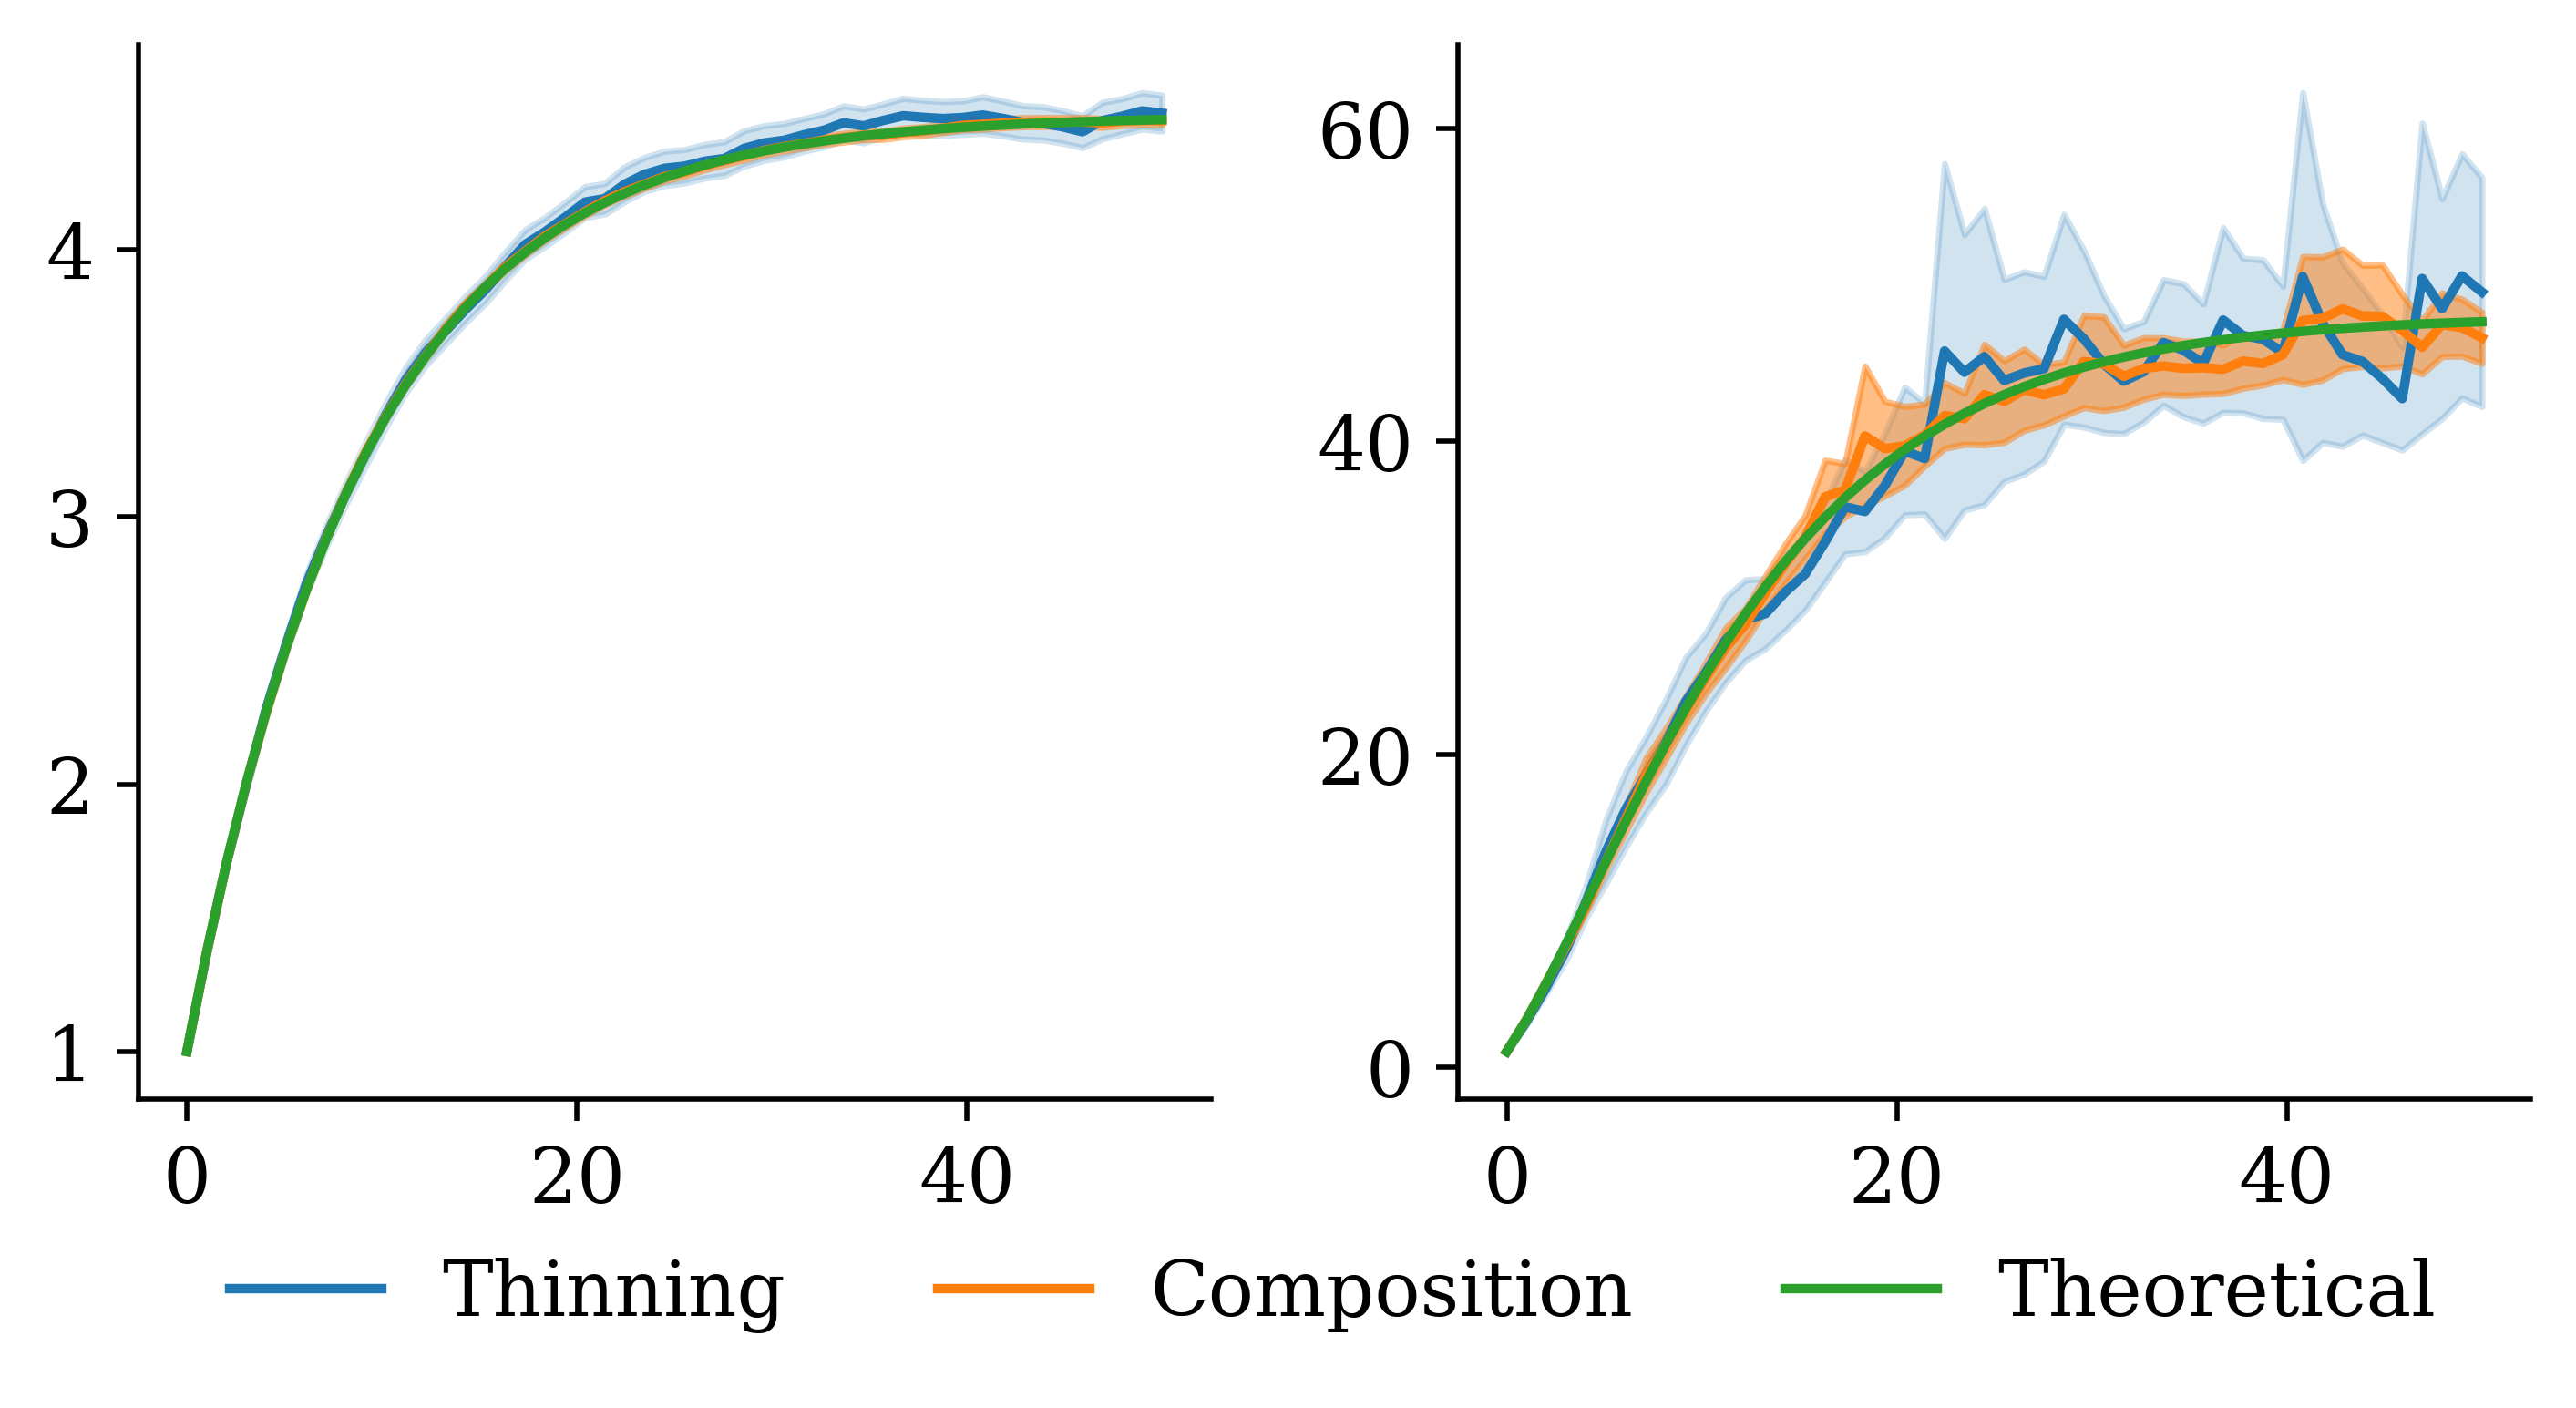

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(6, 3))

axs[0].plot(tGrid, ZEstsThin[0], c="tab:blue")
axs[0].fill_between(
    tGrid,
    ZEstsThin[0] - ZCIWidthsThin[0],
    ZEstsThin[0] + ZCIWidthsThin[0],
    alpha=0.2,
    color="tab:blue",
)

axs[0].plot(tGrid, ZEstsExact[0], c="tab:orange")
axs[0].fill_between(
    tGrid,
    ZEstsExact[0] - ZCIWidthsExact[0],
    ZEstsExact[0] + ZCIWidthsExact[0],
    alpha=0.5,
    color="tab:orange",
)

axs[0].plot(tGrid, ZMoment1, c="tab:green")

sns.despine()
plt.tight_layout()

axs[1].plot(tGrid, ZEstsThin[1], label=f"Thinning", c="tab:blue")
axs[1].fill_between(
    tGrid,
    np.maximum(ZEstsThin[1] - ZCIWidthsThin[1], 0),
    ZEstsThin[1] + ZCIWidthsThin[1],
    alpha=0.2,
    color="tab:blue",
)

axs[1].plot(tGrid, ZEstsExact[1], label=f"Composition", c="tab:orange")
axs[1].fill_between(
    tGrid,
    np.maximum(ZEstsExact[1] - ZCIWidthsExact[1], 0),
    ZEstsExact[1] + ZCIWidthsExact[1],
    alpha=0.5,
    color="tab:orange",
)

axs[1].plot(tGrid, ZMoment2, label="Theoretical", c="tab:green")

lines, labels = axs[1].get_legend_handles_labels()
legend = plt.legend(
    lines,
    labels,
    ncol=3,
    frameon=False,
    bbox_to_anchor=(0.94, -0.12),
    borderaxespad=0.0,
)
sns.despine()

plt.savefig("inverse-moments.pgf", pad_inches=0)

